# Classificação de Exoplanetas com Diferentes Modelos de Machine Learning
Este trabalho tem como objetivo realizar a classificação de exoplanetas com base em dados fornecidos. Utilizaremos diferentes modelos de aprendizado de máquina para comparar desempenhos e determinar o modelo mais eficiente.

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## Carregar e Analisar os Dados
Nesta seção, carregamos o dataset e realizamos uma análise inicial para compreender sua estrutura.

In [2]:
# Carregar o dataset
df = pd.read_csv('koi_data.csv')

# Exibir informações básicas sobre o dataset
print(df.head())  # Visualizar as primeiras linhas
print(df.info())  # Informações sobre os tipos de dados
print(df.describe())  # Estatísticas descritivas

# Separar features (X) e o alvo (y)
X = df.iloc[:, 2:].values  # Features começam na 3ª coluna
y = df.iloc[:, 1].values   # Alvo está na 2ª coluna

# Converter rótulos categóricos para valores binários
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 0 = FALSE_POSITIVE, 1 = CONFIRMED

  kepoi_name koi_disposition  koi_period  koi_impact  koi_duration  koi_depth  \
0  K00752.01       CONFIRMED     9.48804       0.146       2.95750      615.8   
1  K00752.02       CONFIRMED    54.41838       0.586       4.50700      874.8   
2  K00754.01  FALSE POSITIVE     1.73695       1.276       2.40641     8079.2   
3  K00755.01       CONFIRMED     2.52559       0.701       1.65450      603.3   
4  K00114.01  FALSE POSITIVE     7.36179       1.169       5.02200      233.7   

   koi_ror  koi_srho  koi_prad  koi_sma  ...  koi_fwm_srao  koi_fwm_sdeco  \
0  0.02234   3.20796      2.26   0.0853  ...         0.430          0.940   
1  0.02795   3.02368      2.83   0.2734  ...        -0.630          1.230   
2  0.38739   0.22080     33.46   0.0267  ...        -0.111          0.002   
3  0.02406   1.98635      2.75   0.0374  ...        -0.010          0.230   
4  0.18339   0.00485     39.21   0.0820  ...       -13.450         24.090   

   koi_fwm_prao  koi_fwm_pdeco  koi_dicco_mra  koi

## Divisão dos Dados e Normalização
Dividimos os dados em conjuntos de treino e teste e aplicamos normalização para melhorar o desempenho dos modelos.

In [3]:
# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelo 1: Naive Bayes
Utilizamos Naive Bayes como baseline para comparar com os demais modelos.

In [4]:
# Naive Bayes
model_nb = GaussianNB()
scores_nb = cross_val_score(model_nb, X, y, cv=5, scoring='accuracy')
print(f"Naive Bayes - Acurácia média: {scores_nb.mean():.4f}")

Naive Bayes - Acurácia média: 0.8034


## Modelo 2: Decision Tree
Variamos a profundidade máxima para encontrar a configuração ideal.

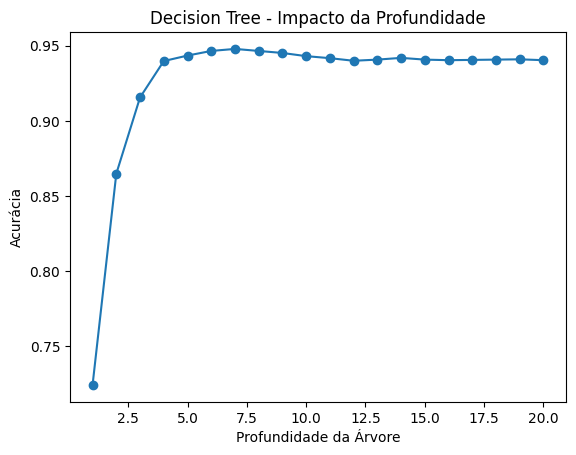

In [5]:
# Decision Tree - Variando a profundidade
depths = range(1, 21)
scores_dt = []

for depth in depths:
    model_dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    score = cross_val_score(model_dt, X, y, cv=5, scoring='accuracy').mean()
    scores_dt.append(score)

plt.plot(depths, scores_dt, marker='o')
plt.xlabel('Profundidade da Árvore')
plt.ylabel('Acurácia')
plt.title('Decision Tree - Impacto da Profundidade')
plt.show()

## Modelo 3: k-NN
Testamos diferentes valores de `k` (número de vizinhos) para encontrar a melhor configuração.

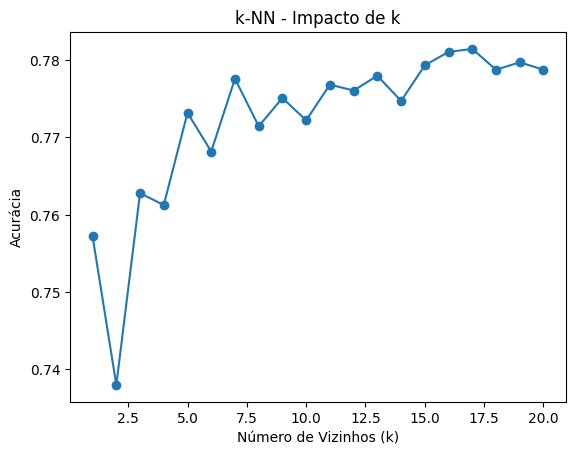

In [6]:
# k-Nearest Neighbors - Variando o número de vizinhos
neighbors = range(1, 21)
scores_knn = []

for k in neighbors:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model_knn, X, y, cv=5, scoring='accuracy').mean()
    scores_knn.append(score)

plt.plot(neighbors, scores_knn, marker='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title('k-NN - Impacto de k')
plt.show()

## Modelo 4: SVM
Exploramos o impacto dos diferentes kernels no desempenho do modelo.

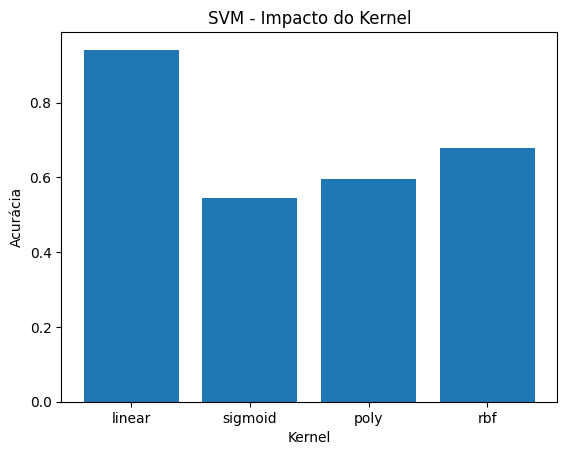

In [7]:
# Support Vector Machines - Testando diferentes kernels
kernels = ['linear', 'sigmoid', 'poly', 'rbf']
scores_svm = []

for kernel in kernels:
    model_svm = SVC(kernel=kernel, random_state=42)
    score = cross_val_score(model_svm, X, y, cv=5, scoring='accuracy').mean()
    scores_svm.append(score)

plt.bar(kernels, scores_svm)
plt.xlabel('Kernel')
plt.ylabel('Acurácia')
plt.title('SVM - Impacto do Kernel')
plt.show()

## Modelo 5: Random Forest
Testamos o impacto do número de árvores no desempenho do modelo.

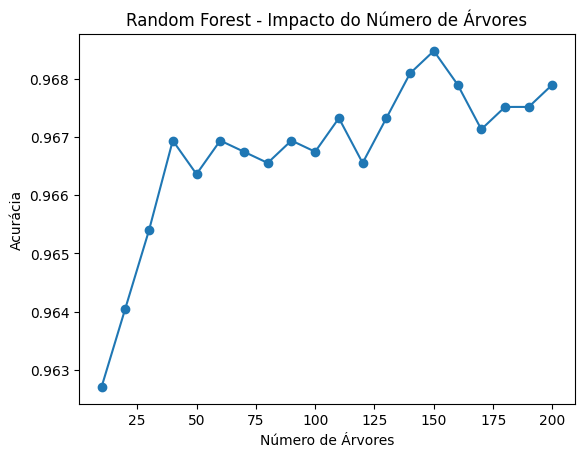

In [8]:
# Random Forest - Variando o número de árvores
n_estimators = range(10, 201, 10)
scores_rf = []

for n in n_estimators:
    model_rf = RandomForestClassifier(n_estimators=n, random_state=42)
    score = cross_val_score(model_rf, X, y, cv=5, scoring='accuracy').mean()
    scores_rf.append(score)

plt.plot(n_estimators, scores_rf, marker='o')
plt.xlabel('Número de Árvores')
plt.ylabel('Acurácia')
plt.title('Random Forest - Impacto do Número de Árvores')
plt.show()

## Modelo 6: Gradient Boosting
Exploramos o impacto da taxa de aprendizado no desempenho do modelo.

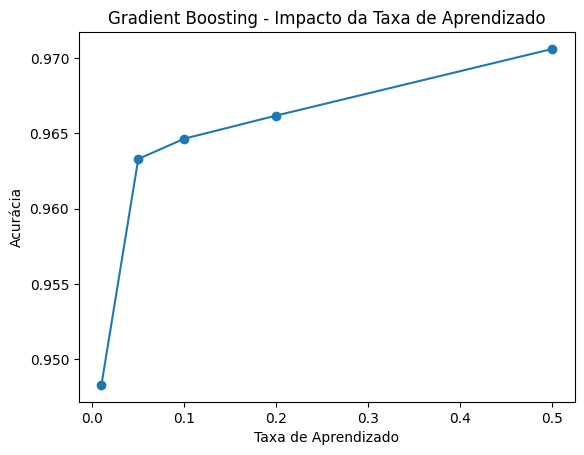

In [9]:
# Gradient Boosting - Variando a taxa de aprendizado
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]
scores_gb = []

for rate in learning_rates:
    model_gb = GradientBoostingClassifier(learning_rate=rate, random_state=42)
    score = cross_val_score(model_gb, X, y, cv=5, scoring='accuracy').mean()
    scores_gb.append(score)

plt.plot(learning_rates, scores_gb, marker='o')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Acurácia')
plt.title('Gradient Boosting - Impacto da Taxa de Aprendizado')
plt.show()